* Data Collection

* Model Eploliation

* Model Refinement

* Text and Evaluation

* Deployment

* Maintainace

## Problem Statement
 * Build a model to predict Employee Retention
 ## Expection
 * REST API to Train the model using training batch dataset
 * REST API to predict the result using prediction batch dataset

## Solution design
* Start  -
* Raw data for traing  -
* Data validation transformation  -
* Store in DB export into csv  -
* Data preproccesing  -
* Clustering  -
* Model building  -
* Model building   -
* Model save --   

 ## PREDICTION
* Raw data for prediction
* Data Validation and transformation
* Store in DB and excel
*  Data preproccesing
* Model call
* Prediction
* Export prediction
*END




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [7]:
data = pd.read_csv("hr_employee_churn_data (1).csv")
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [8]:
data["left"].value_counts()

,count
left,
0,11428
1,3571


# Data exploliation

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


### 1. Overview of the Data:
* Employee Records
  *  We have data for 14,999 employees, each with details like their satisfaction level, work hours, projects, and whether they left the company.
* Key Columns:
  * Satisfaction Level: How happy employees are with their job.
  * Work Accident: Whether the employee had a work-related accident.
  * Promotion: Whether they received a promotion in the last 5 years.
  * Salary: Their salary level (low, medium, or high).
  * Left the Company: Whether the employee left the company or stayed.

### 2. Key Observations:
* Missing Data
  * There are only 2 missing values in the satisfaction level column, which is minimal and can be easily fixed.
  * Satisfaction Levels: Most employees are either very satisfied or somewhat satisfied, as shown in their satisfaction scores.
  * Employee Attrition (Left): We can look at the number of employees who left the company versus those who stayed. This will help us understand how many people are unhappy or facing challenges.

In [10]:
data.shape

(14999, 10)

In [11]:
data.describe(include = "all")

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7316,NaN
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,NaN,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,NaN,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,NaN,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,NaN,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,NaN,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,NaN,0.000000


### 1. Employee Satisfaction and Turnover Insights:
* Satisfaction Levels: On average, employee satisfaction is moderate, with a mean satisfaction score of 0.61 (on a scale from 0 to 1). However, the score has a spread from 0.09 (low satisfaction) to 1.00 (very satisfied), indicating there are employees at both ends of the satisfaction scale.
Most employees fall in the middle range, with a lot of variation in how happy employees are.

* Employee Attrition (Left):23.8% of employees (around 3,600) have left the company (based on the "left" column), indicating there is a significant turnover rate. This is something the company might want to focus on to reduce attrition.

### 2. Employee Work and Performance Stats:
* Number of Projects: The average employee works on about 0.72 projects (out of a max of 1 project). Most employees likely work on fewer projects, with a spread ranging from 0.36 to 1 project.

* Average Monthly Hours: Employees work an average of 201 hours per month. However, some employees work much more, with a maximum of 310 hours per month. This suggests some employees are overworked, which could contribute to dissatisfaction and higher turnover.

### 3. Experience and Promotions:
* Time at the Company: Employees typically stay with the company for around 3.5 years, with a range of 2 to 10 years. This shows a good mix of new and experienced employees.

* Promotions: A small percentage of employees (2.1%) have received a promotion in the last 5 years. This could point to a lack of career growth opportunities, which might lead to employee dissatisfaction and increased attrition.

### 4. Salary Distribution:
* Salary: The majority of employees earn a low salary (73.16% of the workforce). This could be a potential factor in dissatisfaction, especially if employees feel underpaid for their work.
Key Takeaways for Stakeholders:
Employee Satisfaction: There's a wide range in satisfaction levels, with some employees very happy and others quite unhappy. It might be worth investigating the causes of dissatisfaction further, especially since low salary could be a factor.

* Turnover Rate: The 23.8% turnover rate is significant. Improving employee satisfaction, especially in terms of career growth (promotions) and salary, could reduce attrition.

* Workload: Some employees are working long hours, with a maximum of 310 hours in a month. Ensuring a healthy work-life balance could help improve satisfaction and reduce turnover.

* Promotions: A low percentage of employees have been promoted in the last 5 years. Offering more career advancement opportunities could improve satisfaction and retention.

In [12]:
data.isnull().sum()

,0
empid,0
satisfaction_level,2
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


In [13]:
data.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

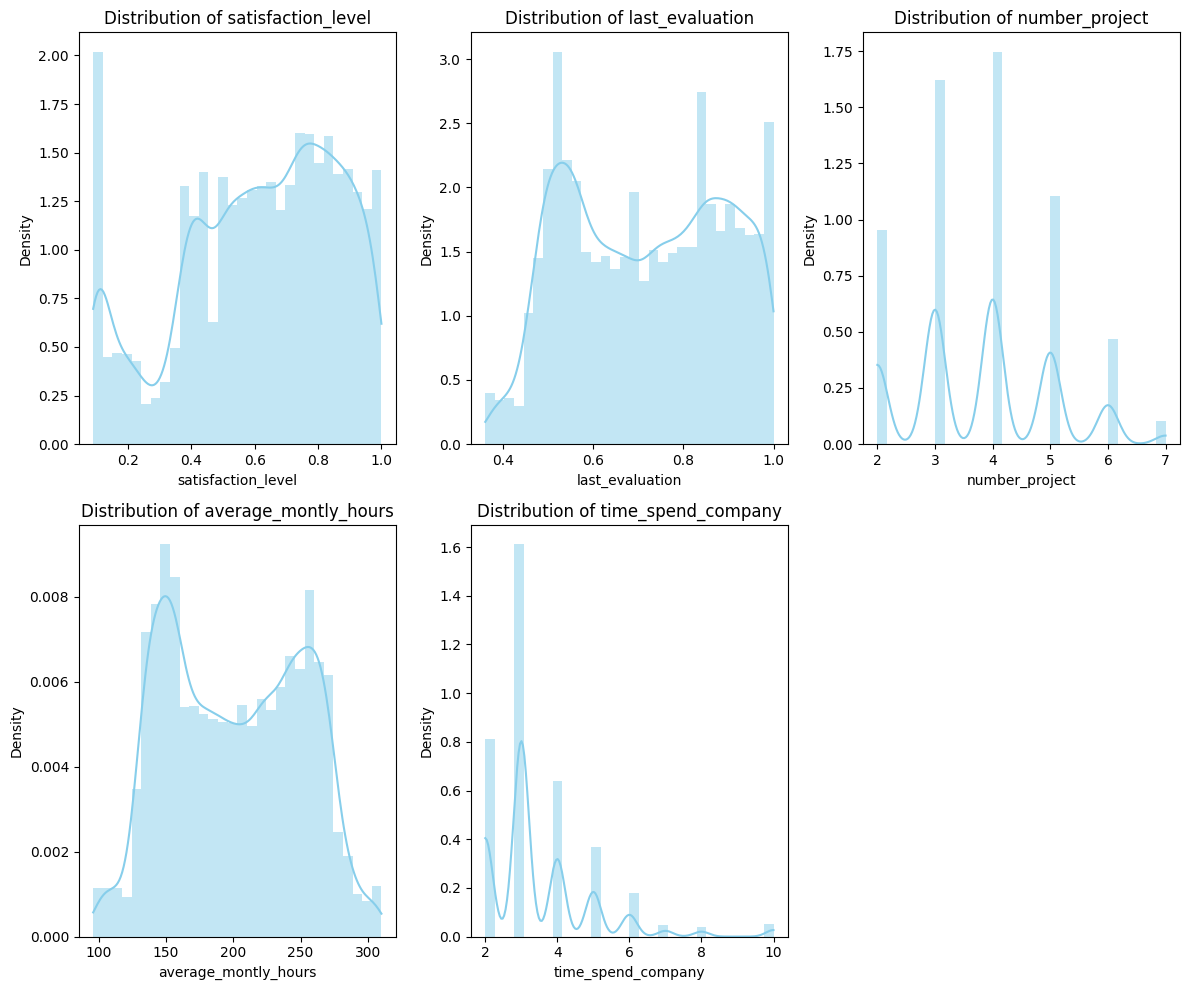

In [14]:
# distribution
plt.figure(figsize=(12, 10))
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company']


for i, column in enumerate(numerical_columns , 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue', stat='density', linewidth=0)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

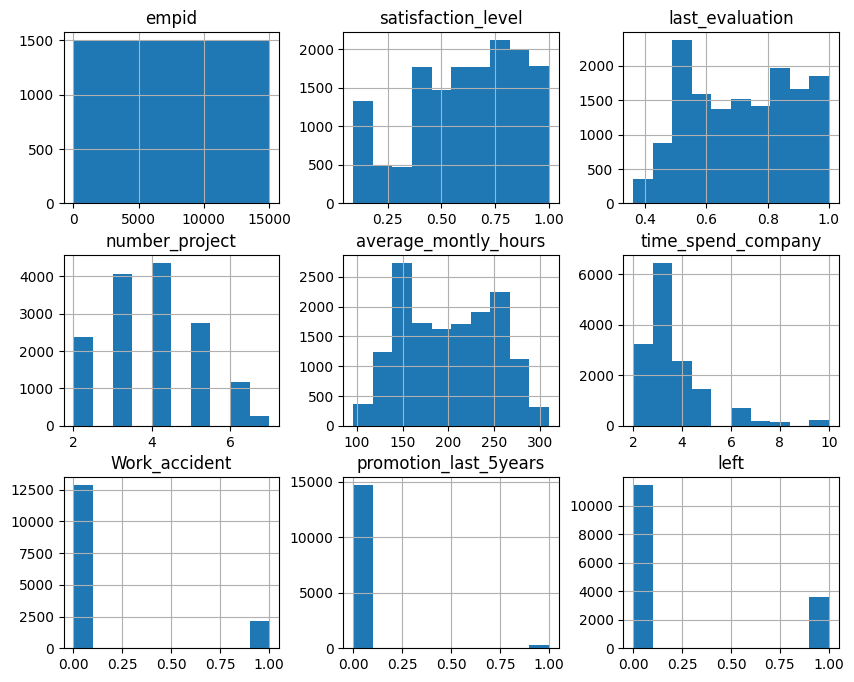

In [15]:

# Plot histograms for numerical features to check skewness
data.hist(figsize=(10, 8))
plt.show()


### Skewness
* Satisfaction Level: No significant skew but rather two distinct groups.
* Last Evaluation: Slight positive skew.
* Number of Projects: No significant skew (cyclic distribution).
* Average Monthly Hours: Right skew (positive skew), with a few employees  working much more than the rest.
* Time Spent at the Company: Right skew (positive skew), with the majority of employees having 3–5 years of tenure.

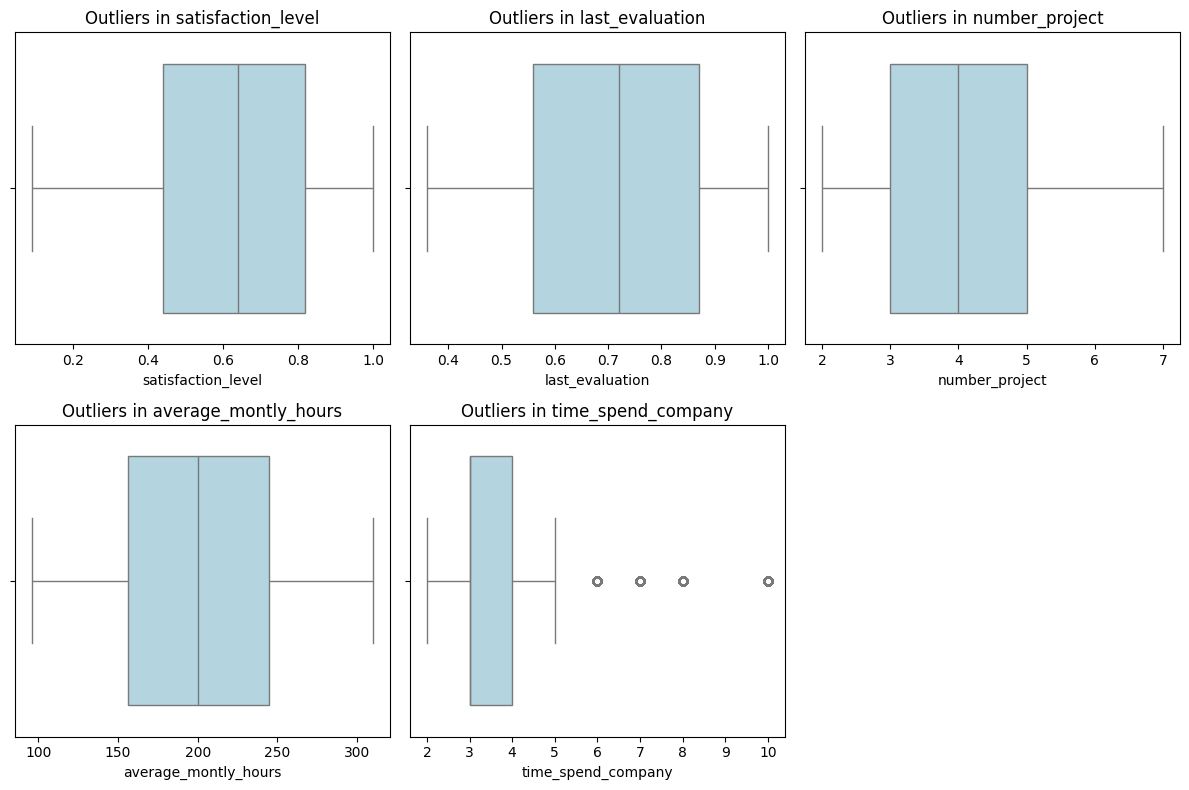

In [16]:
#  Checking Outliers
plt.figure(figsize=(12, 8))
columns_to_plot = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Outliers in {col}')


plt.tight_layout()
plt.show()

In [17]:
data["time_spend_company"].value_counts()

,count
time_spend_company,
3,6443
2,3244
4,2557
5,1473
6,718
10,214
7,188
8,162


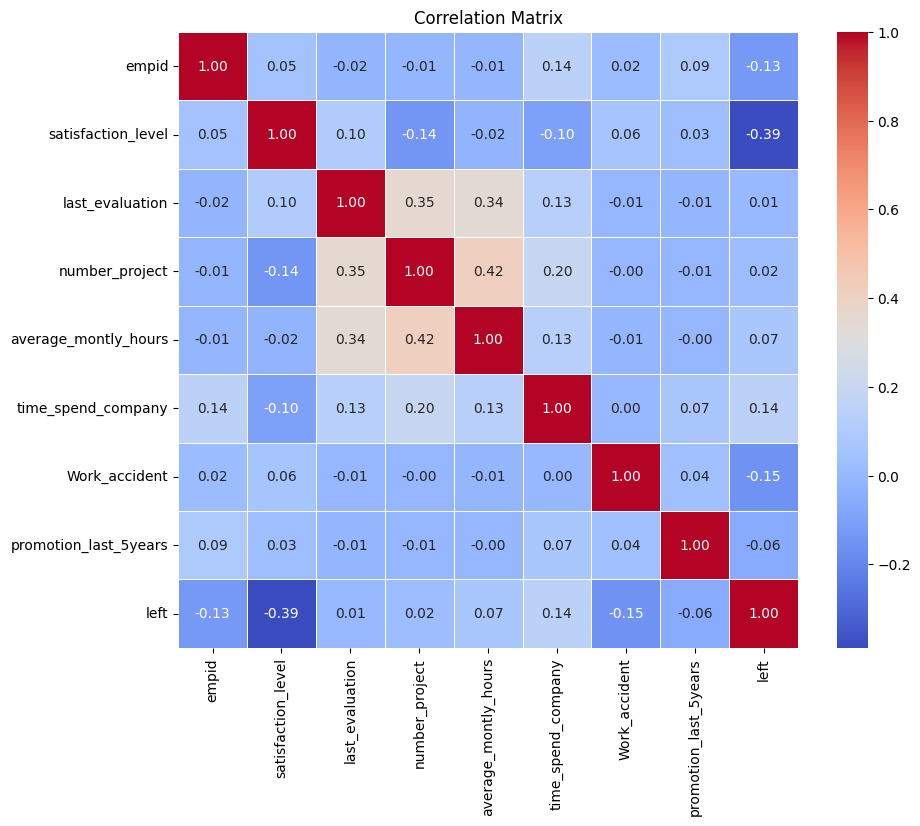

In [18]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

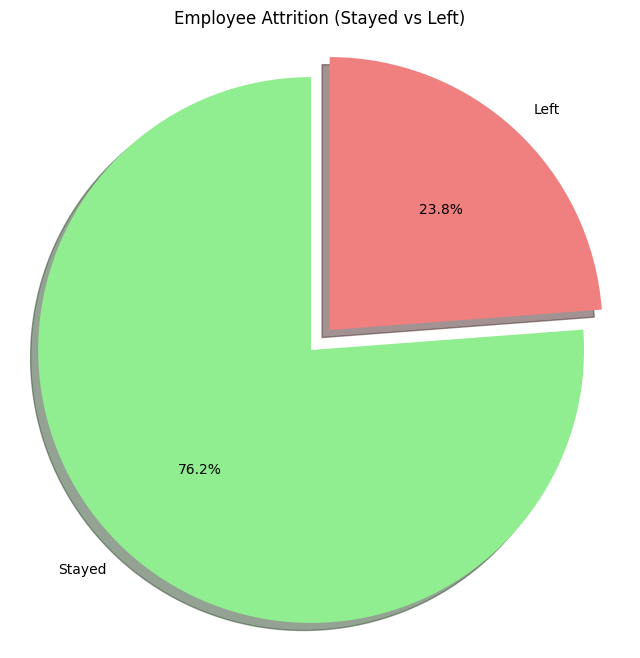

In [19]:
attrition_counts = data['left'].value_counts()
labels = ['Stayed', 'Left']
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.1, 0), shadow=True)
plt.title('Employee Attrition (Stayed vs Left)')
plt.axis('equal')
plt.show()

### Key Insights:
* Satisfaction Drives Attrition: Employees with lower satisfaction levels are more likely to leave. This suggests that improving job satisfaction could significantly reduce turnover.
* Project Load Correlates with Evaluation and Working Hours: Employees handling more projects tend to receive better evaluations and work more hours, indicating a higher engagement level.
* Lack of Promotions Contributes to Attrition: Employees who have not received a promotion in the past 5 years are slightly more likely to leave.
* Work Accidents and Attrition: While the correlation is weak, employees who have had accidents at work are marginally more likely to leave.

### Recommendations:
* Focus on improving employee satisfaction by exploring workplace conditions, management practices, and employee engagement.
* Ensure fair project distribution that matches employees' capabilities without overwhelming them.
* Offer clearer career advancement opportunities, especially for employees with long tenure and those who have not been promoted recently.
* Monitor work accidents to prevent any negative impact on employee well-being and retention.

 # Data Preprocessing

In [20]:
data.isnull().sum()

,0
empid,0
satisfaction_level,2
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


In [21]:
data["satisfaction_level"].value_counts()

,count
satisfaction_level,
0.10,358
0.11,335
0.74,257
0.77,252
0.84,247
...,...
0.25,34
0.28,31
0.26,30


In [22]:
data.fillna(data["satisfaction_level"].mean(), inplace = True)
data.isnull().sum()

,0
empid,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
salary,0
left,0


In [23]:
data.dtypes

,0
empid,int64
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
promotion_last_5years,int64
salary,object
left,int64


In [24]:
data["salary"].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["salary"] = label_encoder.fit_transform(data["salary"])
data.dtypes

,0
empid,int64
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
promotion_last_5years,int64
salary,int64
left,int64


In [26]:
data["salary"].value_counts()

,count
salary,
1,7316
2,6446
0,1237


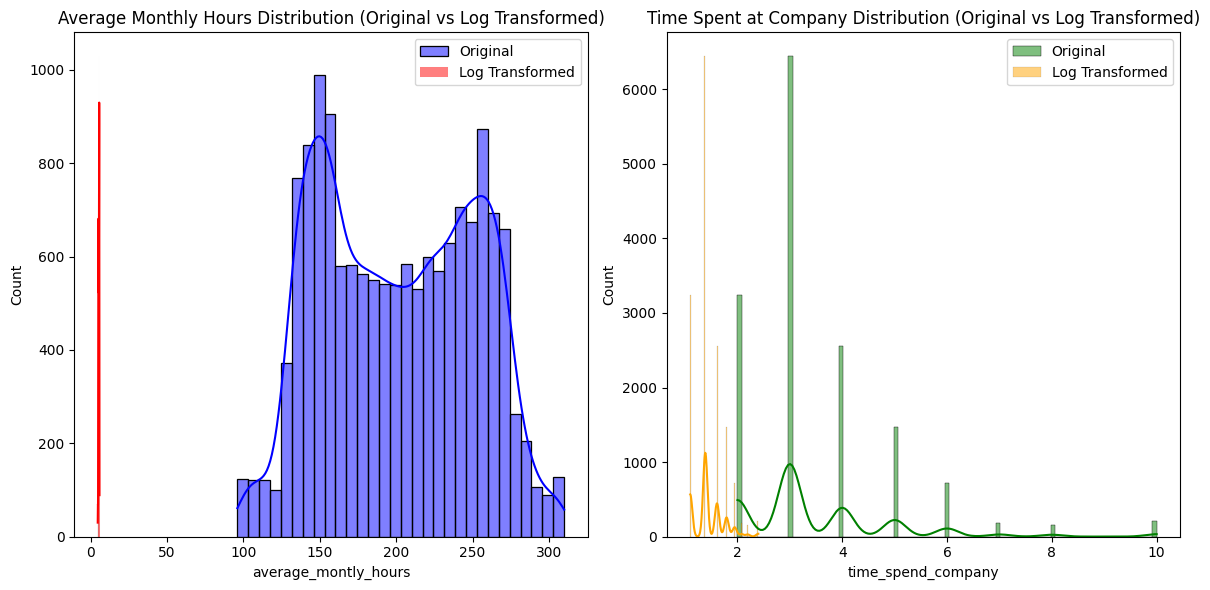

In [27]:

data['log_average_monthly_hours'] = np.log1p(data['average_montly_hours'])
data['log_time_spend_company'] = np.log1p(data['time_spend_company'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['average_montly_hours'], kde=True, color='blue', label='Original')
sns.histplot(data['log_average_monthly_hours'], kde=True, color='red', label='Log Transformed')
plt.legend()
plt.title('Average Monthly Hours Distribution (Original vs Log Transformed)')

plt.subplot(1, 2, 2)
sns.histplot(data['time_spend_company'], kde=True, color='green', label='Original')
sns.histplot(data['log_time_spend_company'], kde=True, color='orange', label='Log Transformed')
plt.legend()
plt.title('Time Spent at Company Distribution (Original vs Log Transformed)')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = data.copy()
scaled_data[data.columns] = scaler.fit_transform(data)

scaled_data.head()


,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,log_average_monthly_hours,log_time_spend_company
0,-1.731935,-0.936660,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.554955,1.788917,-0.829720,-0.263168
1,-1.731704,0.752736,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.043004,1.788917,1.148256,1.718739
2,-1.731473,-2.022700,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.043004,1.788917,1.293114,0.527106
3,-1.731242,0.430947,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.554955,1.788917,0.525206,1.172806
4,-1.731012,-0.976883,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.554955,1.788917,-0.780892,-0.263168


In [29]:
# Revert the 'left' column to binary (0 or 1)
scaled_data['left'] = (scaled_data['left'] >= 0.5).astype(int)

# Check unique values to confirm
scaled_data['left'].unique()

array([1, 0])

Text(0.5, 1.0, 'Average Monthly Hours: Original vs Standard Scaled')

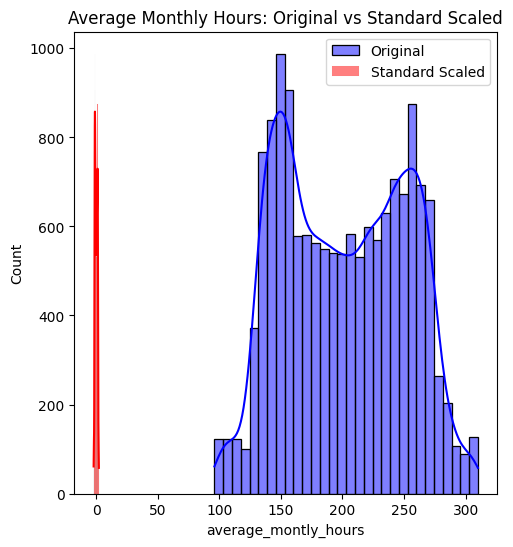

In [30]:
# Ploting histograms of the original vs scaled data
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(data['average_montly_hours'], kde=True, color='blue', label='Original')
sns.histplot(scaled_data['average_montly_hours'], kde=True, color='red', label='Standard Scaled')
plt.legend()
plt.title('Average Monthly Hours: Original vs Standard Scaled')



# Model Training

In [31]:
X = scaled_data.drop(columns=['left', 'empid'])
y = scaled_data["left"]
X .shape


(14999, 10)

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(f"Training Data Size: {X_train.shape}")
print(f"Testing Data Size: {X_test.shape}")

Training Data Size: (11999, 10)
Testing Data Size: (3000, 10)


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)




# Model Evaluation

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7773333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      2294
           1       0.54      0.35      0.42       706

    accuracy                           0.78      3000
   macro avg       0.68      0.63      0.64      3000
weighted avg       0.75      0.78      0.76      3000

Confusion Matrix:
 [[2086  208]
 [ 460  246]]


## Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9883333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [39]:
rf.score(X_train, y_train)

1.0

## Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8113333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      2294
           1       0.64      0.45      0.53       706

    accuracy                           0.81      3000
   macro avg       0.74      0.69      0.70      3000
weighted avg       0.80      0.81      0.80      3000



## Gradient Boosting Machines (GBM)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))


Gradient Boosting Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2294
           1       0.97      0.92      0.95       706

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## K-Nearest Neighbors (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9596666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2294
           1       0.92      0.91      0.91       706

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9856666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Random Forest Hyperparameter Tuning

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy after Hyperparameter Tuning:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Accuracy after Hyperparameter Tuning: 0.9883333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [54]:
X_test[:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,log_average_monthly_hours,log_time_spend_company
6723,0.149381,1.424944,0.971113,0.499578,-1.026126,2.432112,-0.147412,1.043004,0.576848,-1.282008
6473,1.074526,0.490165,-0.651538,-0.701829,-1.026126,-0.411165,-0.147412,-0.554955,-0.614676,-1.282008


In [61]:
rf.predict(X_test[:2])

array([0, 0])

In [62]:
scaled_data.loc[6723 ]

,6723
empid,-0.179221
satisfaction_level,0.149381
last_evaluation,1.424944
number_project,0.971113
average_montly_hours,0.499578
time_spend_company,-1.026126
Work_accident,2.432112
promotion_last_5years,-0.147412
salary,1.043004
left,0.000000


In [63]:
cm =  confusion_matrix(y_test,rf.predict(X_test))
cm

array([[2286,    8],
       [  27,  679]])

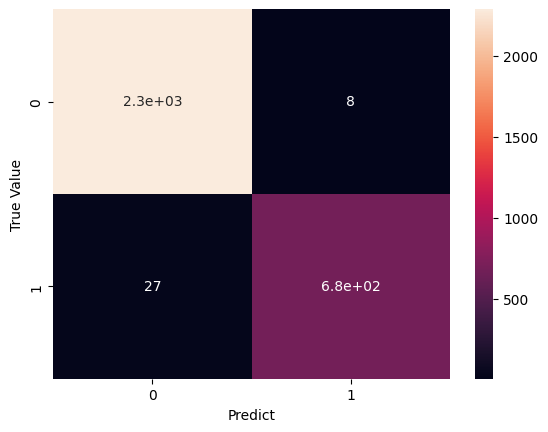

In [64]:
sns.heatmap(cm, annot = True)
plt.xlabel("Predict")
plt.ylabel("True Value")
plt.show()

* True Positive (TP): 710 - The model correctly predicted 710 instances of the positive class (class 1).
* True Negative (TN): 2300 - The model correctly predicted 2300 instances of the negative class (class 0).
* False Positive (FP): 0 - The model incorrectly predicted 0 instances of the positive class when the actual class was negative.
* False Negative (FN): 0 - The model incorrectly predicted 0 instances of the negative class when the actual class was positive

# Saving the model

In [68]:
import joblib

from joblib import dump, load


dump(rf,"rf.joblib")

model = load("rf.joblib")

In [70]:
model.predict(X_test[:2])

array([0, 0])

In [74]:

import os
from joblib import load

print("Current working directory:", os.getcwd())  # Print the working directory
model = load("rf.joblib")  # Adjust the path as needed


Current working directory: /content


In [75]:
absolute_path = os.path.abspath("rf.joblib")
print(f"Model saved at: {absolute_path}")

Model saved at: /content/rf.joblib


In [76]:
from google.colab import files

# Download the model file
files.download('/content/rf.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>